In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

In [2]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

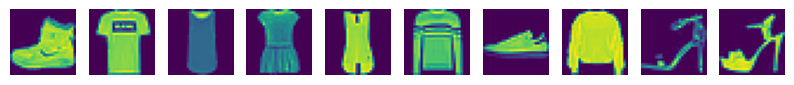

[9 0 0 3 0 2 7 2 5]


In [3]:
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i])
    plt.axis("off")
plt.show()
print(y_train[0:9])

In [4]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

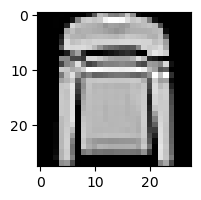

lable: 2


In [5]:
n=5
plt.figure(figsize=(2,2))
plt.imshow(X_train[n],cmap="gray")
plt.show()
print("lable:",y_train[n])

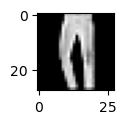

lable: 1


In [6]:
n=5
plt.figure(figsize=(1,1))
plt.imshow(X_test[n],cmap="gray")
plt.show()
print("lable:",y_test[n])

In [7]:
X_train=X_train.reshape(X_train.shape[0],-1)
X_test=X_test.reshape(X_test.shape[0],-1)
X_train.shape,X_test.shape

((60000, 784), (10000, 784))

In [8]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

BasicNN Multi_layer_perceptron (MLP) without any alteration

In [9]:
from keras.models import Sequential
from keras.layers import Activation,Dense
from keras import optimizers

In [10]:
model=Sequential()
model.add(Dense(50,input_shape=(784,)))
model.add(Activation("sigmoid"))
model.add(Dense(50))
model.add(Activation("sigmoid"))
model.add(Dense(50))
model.add(Activation("sigmoid"))
model.add(Dense(50))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))


In [11]:
sgd= optimizers.SGD(lr=0.01)# only a single random data point (or a small batch of data points) is used to compute the gradient and update the parameters in each iteration.SGD introduces randomness into the optimization process, which can help escape local minima and speed up convergence.
model.compile(optimizer=sgd,loss="categorical_crossentropy",metrics=["accuracy"])

C:\HariniLearn\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Stochastic Gradient Descent (SGD) and Gradient Descent are both optimization algorithms used to update the parameters of a machine learning model during the training process. However, they differ in how they update the parameters and their impact on the training process. Let's compare SGD and Gradient Descent:

Gradient Descent (GD):

In standard Gradient Descent, the entire training dataset is used to compute the gradient of the loss function with respect to the model parameters (weights and biases).
It calculates the average gradient over the entire dataset and updates the parameters in the direction that reduces the loss.
GD can be computationally expensive and memory-intensive, especially for large datasets.
Stochastic Gradient Descent (SGD):

In Stochastic Gradient Descent, only a single random data point (or a small batch of data points) is used to compute the gradient and update the parameters in each iteration.
SGD introduces randomness into the optimization process, which can help escape local minima and speed up convergence.
Due to the random nature of the data points used for updates, the optimization process can exhibit a lot of variance, causing the loss to oscillate during training.
While SGD can converge faster and is less memory-intensive than GD, it can be noisy and may require careful tuning of learning rate and other hyperparameters.
Comparison:

Convergence Speed: In general, SGD can converge faster than GD because it updates the parameters more frequently with smaller subsets of data. However, the path to convergence can be noisy and may require learning rate adjustments.
Memory Usage: GD requires storing and computing gradients for the entire dataset, which can be memory-intensive. SGD uses only a subset of data, making it more memory-efficient.
Noise and Variance: SGD introduces randomness by using random data points for updates, leading to noise and variance in the optimization process. GD, on the other hand, has a more deterministic path.
Local Minima: SGD's randomness can help it escape local minima, whereas GD can get stuck in them if the initial point is not chosen well.
Batch Size: SGD's behavior can be adjusted by changing the batch size. A small batch size introduces more randomness, while larger batch sizes introduce more stability and smoother convergence (Mini-batch Gradient Descent is a compromise between the two extremes).
Learning Rate Tuning: SGD often requires more careful tuning of the learning rate and other hyperparameters due to its stochastic nature. GD's convergence is more predictable.
In practice, variations and improvements of both algorithms have been developed to address their respective weaknesses. For example, Mini-batch Gradient Descent combines aspects of both GD and SGD by using small batches of data for updates. Other optimization algorithms, like Adam and RMSprop, further refine the update process by adapting the learning rate based on past gradients. The choice of optimization algorithm depends on factors such as the dataset size, model architecture, and specific optimization goals.

In [12]:
history=model.fit(X_train,y_train,batch_size=200,epochs=100,verbose=1)

Epoch 1/100
300/300 [==============================] - 1s 2ms/step - loss: 2.3388 - accuracy: 0.0978
Epoch 2/100
300/300 [==============================] - 1s 2ms/step - loss: 2.3002 - accuracy: 0.1270
Epoch 3/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2986 - accuracy: 0.1468
Epoch 4/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2968 - accuracy: 0.1614
Epoch 5/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2950 - accuracy: 0.1965
Epoch 6/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2931 - accuracy: 0.2298
Epoch 7/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2909 - accuracy: 0.2659
Epoch 8/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2882 - accuracy: 0.2498
Epoch 9/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2851 - accuracy: 0.3088
Epoch 10/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2815 - accura

300/300 [==============================] - 1s 3ms/step - loss: 0.8686 - accuracy: 0.6742
Epoch 82/100
300/300 [==============================] - 1s 3ms/step - loss: 0.8596 - accuracy: 0.6818
Epoch 83/100
300/300 [==============================] - 1s 3ms/step - loss: 0.8642 - accuracy: 0.6846
Epoch 84/100
300/300 [==============================] - 1s 3ms/step - loss: 0.8520 - accuracy: 0.6812
Epoch 85/100
300/300 [==============================] - 1s 3ms/step - loss: 0.8418 - accuracy: 0.6839
Epoch 86/100
300/300 [==============================] - 1s 3ms/step - loss: 0.8333 - accuracy: 0.6831
Epoch 87/100
300/300 [==============================] - 1s 3ms/step - loss: 0.8215 - accuracy: 0.7030
Epoch 88/100
300/300 [==============================] - 1s 3ms/step - loss: 0.8101 - accuracy: 0.7024
Epoch 89/100
300/300 [==============================] - 1s 3ms/step - loss: 0.8010 - accuracy: 0.6997
Epoch 90/100
300/300 [==============================] - 1s 3ms/step - loss: 0.7914 - accuracy: 

In [13]:
results= model.evaluate(X_test,y_test)
print ("Test loss & accuracy=",results)

313/313 [==============================] - 1s 1ms/step - loss: 0.7525 - accuracy: 0.7444
Test loss & accuracy= [0.7525450587272644, 0.7444000244140625]


Changing weight initialization improve vanishing gradient problem
that is adding itemizied weights instead of random weights using he_normal kernal


"He_normal" (also known as "He initialization" or "He normal initialization") is a weight initialization technique used in neural networks. It specifically focuses on initializing the weights of the network's layers in a way that helps with more stable and efficient training. This technique is particularly popular for networks that use Rectified Linear Unit (ReLU) or its variants as activation functions.

The term "kernel" in this context refers to the filter weights used in convolutional layers. Weight initialization is crucial because it can impact the convergence speed and overall performance of a neural network during training.

The He_normal initialization initializes the weights of the network's layers using a Gaussian distribution with a mean of 0 and a standard deviation calculated as the square root of 2 divided by the number of input units in the layer. Mathematically, for a layer with n input units, the standard deviation (σ) of the Gaussian distribution is:

σ = sqrt(2 / n)

The reason behind this choice of initialization comes from the mathematical properties of the ReLU activation function. The ReLU function is defined as f(x) = max(0, x), which means it becomes active (non-zero gradient) when its input is positive. By initializing weights with He_normal, the aim is to ensure that the outputs of the activation function are neither too small nor too large, reducing the likelihood of vanishing or exploding gradients.

In summary, He_normal initialization helps improve the training of deep neural networks by providing appropriate initial weights that work well with ReLU-like activation functions, leading to more efficient convergence and potentially better performance. It's worth noting that different activation functions and architectures might benefit from other weight initialization strategies, so experimentation and adaptation to the specific problem at hand are essential.

In [14]:
#mlp=multilayer perceptron
def mlp_model():
    model=Sequential()
    model.add(Dense(50,input_shape=(784,)))
    model.add(Activation("sigmoid"))
    model.add(Dense(50,kernel_initializer="he_normal"))
    model.add(Activation("sigmoid"))
    model.add(Dense(50,kernel_initializer="he_normal"))
    model.add(Activation("sigmoid"))
    model.add(Dense(50,kernel_initializer="he_normal"))
    model.add(Activation("sigmoid"))
    model.add(Dense(10,kernel_initializer="he_normal"))
    model.add(Activation("softmax"))
    sgd= optimizers.SGD(lr=0.01)
    model.compile(optimizer=sgd,loss="categorical_crossentropy",metrics=["accuracy"])
    return model

In [15]:
model=mlp_model()
history=model.fit(X_train,y_train,batch_size=200,epochs=100,verbose=1)

Epoch 1/100
300/300 [==============================] - 1s 3ms/step - loss: 2.3001 - accuracy: 0.1496
Epoch 2/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2843 - accuracy: 0.3018
Epoch 3/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2750 - accuracy: 0.3497
Epoch 4/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2638 - accuracy: 0.3868
Epoch 5/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2496 - accuracy: 0.4037
Epoch 6/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2306 - accuracy: 0.4217
Epoch 7/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2026 - accuracy: 0.4277
Epoch 8/100
300/300 [==============================] - 1s 3ms/step - loss: 2.1659 - accuracy: 0.4214
Epoch 9/100
300/300 [==============================] - 1s 3ms/step - loss: 2.1127 - accuracy: 0.4086
Epoch 10/100
300/300 [==============================] - 1s 3ms/step - loss: 2.0400 - accura

300/300 [==============================] - 1s 3ms/step - loss: 0.6125 - accuracy: 0.8003
Epoch 82/100
300/300 [==============================] - 1s 3ms/step - loss: 0.6108 - accuracy: 0.8001
Epoch 83/100
300/300 [==============================] - 1s 3ms/step - loss: 0.5983 - accuracy: 0.8029
Epoch 84/100
300/300 [==============================] - 1s 3ms/step - loss: 0.5929 - accuracy: 0.8071
Epoch 85/100
300/300 [==============================] - 1s 3ms/step - loss: 0.5900 - accuracy: 0.8076
Epoch 86/100
300/300 [==============================] - 1s 3ms/step - loss: 0.5806 - accuracy: 0.8125
Epoch 87/100
300/300 [==============================] - 1s 3ms/step - loss: 0.5784 - accuracy: 0.8125
Epoch 88/100
300/300 [==============================] - 1s 3ms/step - loss: 0.5801 - accuracy: 0.8057
Epoch 89/100
300/300 [==============================] - 1s 3ms/step - loss: 0.5699 - accuracy: 0.8131
Epoch 90/100
300/300 [==============================] - 1s 3ms/step - loss: 0.5654 - accuracy: 

In [16]:
results= model.evaluate(X_test,y_test)
print ("Test loss & accuracy =",results)

313/313 [==============================] - 1s 2ms/step - loss: 0.6233 - accuracy: 0.7874
Test loss & accuracy = [0.6233269572257996, 0.7874000072479248]


Comparatively loss have reduced and accurancy improved by predefined weights

Non_linearity(Activation Function)

In [17]:

def mlp_model():
    model=Sequential()
    model.add(Dense(50,input_shape=(784,)))
    model.add(Activation("relu"))
    model.add(Dense(50,kernel_initializer="he_normal"))
    model.add(Activation("relu"))
    model.add(Dense(50,kernel_initializer="he_normal"))
    model.add(Activation("relu"))
    model.add(Dense(50,kernel_initializer="he_normal"))
    model.add(Activation("relu"))
    model.add(Dense(10,kernel_initializer="he_normal"))
    model.add(Activation("softmax"))
    sgd= optimizers.SGD(lr=0.01)
    model.compile(optimizer=sgd,loss="categorical_crossentropy",metrics=["accuracy"])
    return model


model=mlp_model()
history=model.fit(X_train,y_train,batch_size=200,epochs=10,verbose=1)

Epoch 1/10
300/300 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0999
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 8/10
300/300 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 9/10
300/300 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.1000
Epoch 10/10
300/300 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000


In [18]:
results= model.evaluate(X_test,y_test)
print ("Test loss & accuracy=",results)

313/313 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.1000
Test loss & accuracy= [nan, 0.10000000149011612]


Batch Normalization,Dropout
Batch Normalization is inserted after Dense/convolution layer and before nonlinearity

In [19]:
from keras.layers import BatchNormalization,Dropout
def mlp_model():
    model=Sequential()
    model.add(Dense(50,input_shape=(784,)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dense(50))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dense(10))
    model.add(Activation("softmax"))
    sgd= optimizers.SGD(lr=0.01)
    model.compile(optimizer=sgd,loss="categorical_crossentropy",metrics=["accuracy"])
    return model


model=mlp_model()
history=model.fit(X_train,y_train,batch_size=200,epochs=10,verbose=1)

Epoch 1/10
300/300 [==============================] - 2s 4ms/step - loss: 0.8979 - accuracy: 0.7167
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.5574 - accuracy: 0.8122
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4869 - accuracy: 0.8333
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4462 - accuracy: 0.8447
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4201 - accuracy: 0.8532
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4017 - accuracy: 0.8590
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3861 - accuracy: 0.8642
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3738 - accuracy: 0.8683
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3614 - accuracy: 0.8725
Epoch 10/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3527 - accuracy: 0.8740

In [20]:
results= model.evaluate(X_test,y_test)
print ("Test accuracy=",results)

313/313 [==============================] - 1s 2ms/step - loss: 0.3996 - accuracy: 0.8575
Test accuracy= [0.3996044099330902, 0.8575000166893005]


Dropout

In [21]:
from keras.layers import BatchNormalization,Dropout
def mlp_model():
    model=Sequential()
    model.add(Dense(50,input_shape=(784,)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.2))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.2))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(50))
    model.add(Activation("relu"))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(10))
    model.add(Activation("softmax"))
    sgd= optimizers.SGD(lr=0.01)
    model.compile(optimizer=sgd,loss="categorical_crossentropy",metrics=["accuracy"])
    return model


model=mlp_model()
history=model.fit(X_train,y_train,batch_size=200,epochs=10,verbose=1)

Epoch 1/10
300/300 [==============================] - 2s 4ms/step - loss: 1.5727 - accuracy: 0.4685
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 1.0471 - accuracy: 0.6450
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.9022 - accuracy: 0.6907
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.8224 - accuracy: 0.7124
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.7742 - accuracy: 0.7309
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.7378 - accuracy: 0.7435
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.7058 - accuracy: 0.7560
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.6822 - accuracy: 0.7630
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 0.6620 - accuracy: 0.7732
Epoch 10/10
300/300 [==============================] - 1s 4ms/step - loss: 0.6445 - accuracy: 0.7768

In [22]:
results= model.evaluate(X_test,y_test)
print ("Test accuracy=",results)

313/313 [==============================] - 1s 2ms/step - loss: 0.4943 - accuracy: 0.8251
Test accuracy= [0.49425366520881653, 0.8251000046730042]


Normalization in Machine Learning (ML) and Batch Normalization in Neural Networks (NN) are both techniques used to preprocess and stabilize the input data or activations of a model, but they serve different purposes and are applied at different levels.

Normalization in Machine Learning:
Normalization in the context of ML typically refers to the process of scaling features to a standard range. It is often used in algorithms that rely on distance metrics, such as k-nearest neighbors and support vector machines, to ensure that no particular feature dominates the calculation of distances. Common forms of normalization include Min-Max scaling, Z-score normalization, and robust normalization.

Batch Normalization in Neural Networks:
Batch Normalization (BN) is a technique specific to neural networks that aims to address the problem of internal covariate shift. Internal covariate shift occurs when the distribution of activations in a deep neural network changes during training, which can slow down training and make convergence difficult. Batch Normalization normalizes the input of each layer by centering and scaling it based on the statistics (mean and variance) computed over a batch of training examples.

Batch Normalization has several benefits:

Accelerates training by reducing internal covariate shift, allowing for higher learning rates.
Can act as a form of regularization, reducing the need for techniques like dropout.
Helps with gradient flow and mitigates vanishing/exploding gradient issues.
Reduces sensitivity to initialization.
Can enable the use of saturating non-linearities.
In summary, normalization in ML is a general preprocessing step to ensure consistent feature scaling, while Batch Normalization in NN is a specific technique applied within the layers of a neural network to stabilize and speed up the training process. Both techniques aim to improve the stability and convergence of models, but they operate at different levels of the machine learning process.

The "shift in distribution" refers to the change in the statistical properties (such as mean and variance) of the activations of a neural network layer as the input data passes through that layer during training. In other words, it's a change in the values and spread of the data that flows through the network's layers.

To illustrate this concept further, let's use a simplified example:

Imagine you have a neural network with a single hidden layer. The input data for this network is images of handwritten digits, and the network's task is to classify these digits. As the input data moves through the layers, the activations (outputs of the neurons) for each neuron in the hidden layer are computed. Now, if you were to monitor the distribution of these activations over the course of training (i.e., for each batch of data processed), you might observe the following:

Initial Distribution: At the beginning of training, the activations of the neurons in the hidden layer might have a certain distribution—let's say it has a specific mean and variance.

Changing Distribution: As the training progresses, the network updates its weights based on the gradients computed during backpropagation. This can cause the activations of the neurons in the hidden layer to change. The distribution of these activations (their mean and variance) might shift, becoming different from what it was initially.

This shift in distribution is what's referred to as "internal covariate shift." It's a consequence of the changing parameters of the network and the nonlinear activation functions applied at each layer. As the network updates its parameters to fit the training data better, the activations of each layer can vary widely.

Now, this shift in distribution can lead to the issues mentioned earlier, such as vanishing or exploding gradients, slower convergence, and unstable learning dynamics. Batch Normalization is designed to mitigate these issues by normalizing the activations within each layer, effectively centering and scaling them to have a more consistent distribution. This helps to stabilize the training process and improve the overall performance of the neural network.

Certainly, let's delve into the concept of internal covariate shift and its implications in deep neural networks.

Internal Covariate Shift:

In a deep neural network, each layer consists of neurons that apply a set of weights to the inputs and then pass the result through an activation function. As the network trains, the parameters (weights and biases) of these neurons get updated through backpropagation. However, the distribution of the input data that flows through the layers can change significantly during training. This phenomenon is known as "internal covariate shift."

To understand this better, consider the layers of a neural network as individual processing units. As the input data moves through these layers, the activations of each layer can change in terms of distribution. This shift in the distribution can lead to several issues:

Vanishing and Exploding Gradients:
When the distribution of activations changes dramatically, gradients during backpropagation can become extremely small (vanishing gradients) or extremely large (exploding gradients). This makes it challenging for the network to learn effectively and converge to a good solution.

Slower Convergence:
If the distribution of activations keeps changing, the network may require a smaller learning rate to ensure stable convergence. However, using a very small learning rate can slow down the training process significantly.

Unstable Learning:
Different layers might converge at different rates or not converge at all due to the changing distribution. This can lead to unstable learning dynamics, where some layers are lagging in learning, while others are already well-trained.

Reduced Generalization:
A network that is sensitive to changes in input distribution might not generalize well to unseen data, as it may overfit to the specific distribution of the training data.

Batch Normalization to Address Internal Covariate Shift:

Batch Normalization (BN) is a technique designed to alleviate the issues caused by internal covariate shift. It involves normalizing the activations of each layer in a neural network based on the statistics (mean and variance) computed over a mini-batch of training examples. This normalization process has several benefits:

Stabilized Learning: By normalizing activations, BN ensures that the distribution of inputs to each layer remains more consistent during training, helping to mitigate vanishing and exploding gradients.

Faster Convergence: With more stable distributions, networks using BN can often use higher learning rates, accelerating the convergence process.

Regularization Effect: Batch Normalization introduces a small amount of noise during training, acting as a form of regularization. This can reduce the need for other regularization techniques like dropout.

Improved Gradient Flow: By normalizing activations, BN helps gradients flow more effectively through the network, reducing the likelihood of convergence issues.

Reduced Sensitivity to Initialization: Networks with BN are generally less sensitive to the choice of weight initialization, making it easier to experiment with different architectures.

In summary, internal covariate shift can impede the training of deep neural networks, and Batch Normalization is a technique that counteracts this phenomenon by normalizing activations within each layer. This normalization process leads to improved stability, faster convergence, and ultimately better-performing neural networks.